# **Project Theme:**
## Understanding the Temporal Dynamics and Interdisciplinary Nature of Academic Collaborations in arXiv, with Predictive Modeling of Future Co-Authorships

In [15]:
import json
import networkx as nx
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter

In [17]:
# Create one empty graph per year from 2000 to 2024
yearly_graphs = {year: nx.Graph() for year in range(2000, 2025)}

## **DELIVERABLE 1 : Temporal Evolution of the Co-Authorship Network** 

### **Step 1:** Parse arXiv JSON & Build Yearly Co-Authorship Graphs

In [31]:
# Adjust this path based on your notebook environment
file_path = '/kaggle/input/arxiv/arxiv-metadata-oai-snapshot.json'

# Limit lines to avoid memory overflow — 1 million is a good start
max_lines = 1_000_000  

with open(file_path, 'r') as f:
    for i, line in enumerate(tqdm(f, total=max_lines)):
        if i >= max_lines:
            break
        try:
            entry = json.loads(line)
            year = int(entry['update_date'][:4])
            if year < 2000 or year > 2024:
                continue
            
            authors = [a.strip() for a in entry['authors'].split(',') if a.strip()]
            if len(authors) > 30:
                continue  # Ignore mega-authored papers
            
            for i in range(len(authors)):
                for j in range(i + 1, len(authors)):
                    yearly_graphs[year].add_edge(authors[i], authors[j])
        except:
            continue  # Skip corrupted lines

100%|██████████| 1000000/1000000 [00:45<00:00, 21891.58it/s]


## **Step 2:** Compute Yearly Network Metrics (Nodes, Edges, Degree, Clustering, Density)

In [32]:
metrics = []

for year, G in yearly_graphs.items():
    N = G.number_of_nodes()
    E = G.number_of_edges()
    if N == 0:
        continue  # Skip empty years
    avg_deg = sum(dict(G.degree()).values()) / N
    clustering = nx.average_clustering(G)
    density = nx.density(G)
    
    metrics.append({
        "Year": year,
        "Nodes": N,
        "Edges": E,
        "Avg_Degree": avg_deg,
        "Clustering": clustering,
        "Density": density
    })

# Convert to DataFrame
df_metrics = pd.DataFrame(metrics)
df_metrics.set_index("Year", inplace=True)
df_metrics

,Nodes,Edges,Avg_Degree,Clustering,Density
Year,,,,,
2007,18877,47791,5.063410,0.786365,0.000268
2008,51321,157105,6.122445,0.770875,0.000119
2009,114186,475811,8.333964,0.789424,0.000073
2010,68953,217652,6.313054,0.779095,0.000092
2011,79326,250825,6.323904,0.784444,0.000080
2012,82745,247151,5.973799,0.782368,0.000072
2013,109140,350224,6.417885,0.784544,0.000059
2014,130720,457104,6.993635,0.788815,0.000054
2015,328505,1890200,11.507892,0.773062,0.000035


## **Step 3:** Visualize Temporal Trends in Network Properties

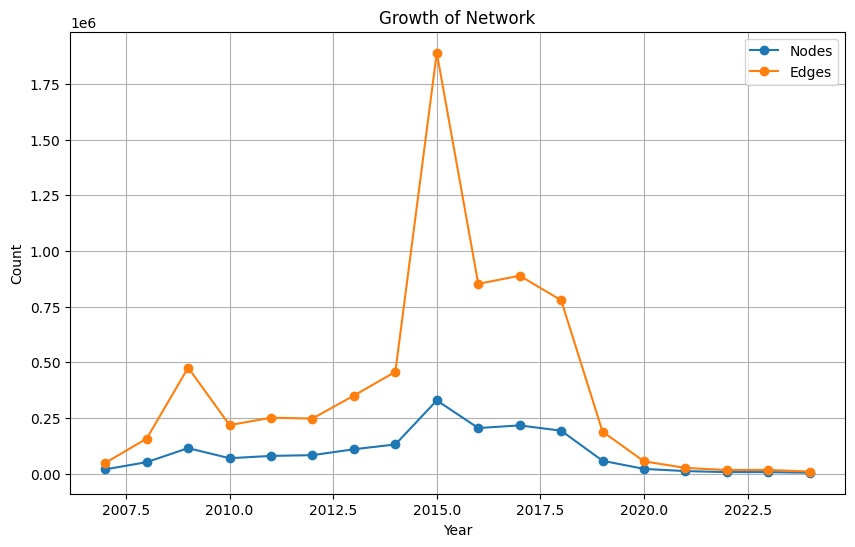

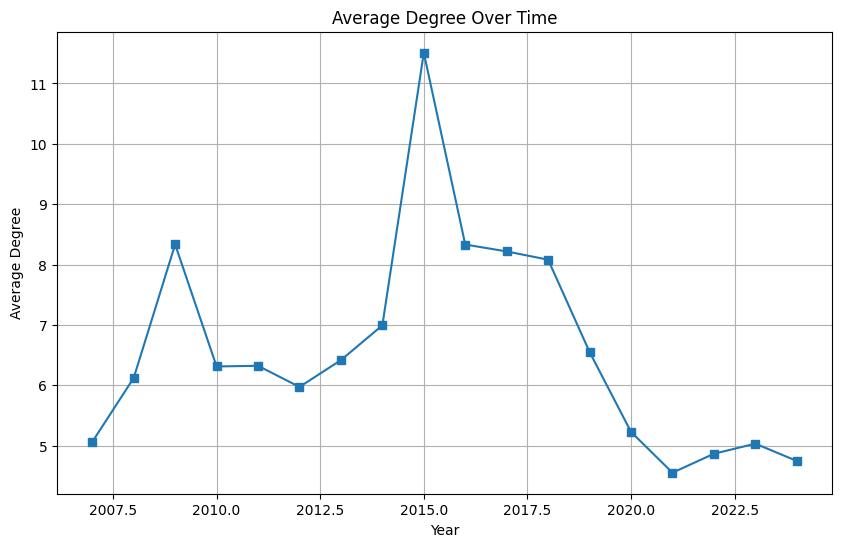

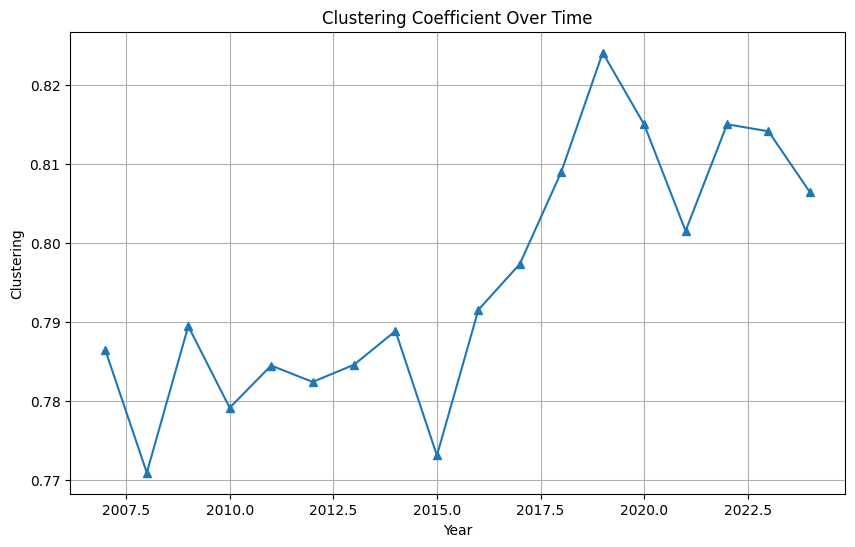

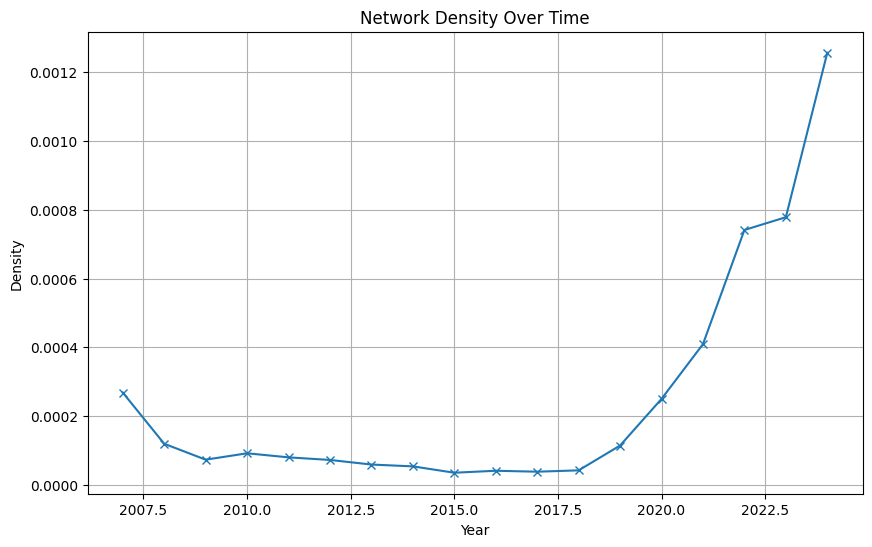

In [5]:
df_metrics[['Nodes$', 'Edges']].plot(marker='o', figsize=(10,6), title="Growth of Network")
plt.ylabel("Count")
plt.grid(True)
plt.show()

df_metrics['Avg_Degree'].plot(marker='s', figsize=(10,6), title="Average Degree Over Time")
plt.ylabel("Average Degree")
plt.grid(True)
plt.show()

df_metrics['Clustering'].plot(marker='^', figsize=(10,6), title="Clustering Coefficient Over Time")
plt.ylabel("Clustering")
plt.grid(True)
plt.show()

df_metrics['Density'].plot(marker='x', figsize=(10,6), title="Network Density Over Time")
plt.ylabel("Density")
plt.grid(True)
plt.show()

## Analysis of Co-authorship Network Evolution (2007–2024)
### **1. Growth of the Network (Nodes & Edges)**
* From 2007 to 2015, the network saw a sharp increase in both nodes and edges, peaking in 2015.

* The number of edges in 2015 crossed 1.8 million, with over 328,000 nodes, indicating a dramatic spike in collaborative publications that year.

* Post-2015, there’s a noticeable decline, especially from 2019 onward, which could reflect incomplete data, changes in authoring patterns, or evolving publication norms.

* The sharp fall in 2020–2024 may also be affected by fewer entries in the metadata or a lag in dataset updates.

### **2. Average Degree Over Time**
* The average degree (i.e., the number of co-authors per author) peaked in 2015, aligning with the spike in node and edge counts.

* After 2015, the average degree steadily declined, reaching its lowest in 2021, indicating smaller collaborative teams or reduced connectivity in recent years.

* This suggests that although collaboration was high mid-decade, recent papers involve fewer co-authors per author.

### **3. Clustering Coefficient Over Time**
* The clustering coefficient remained relatively stable until 2015, after which it increased gradually, peaking around 2019–2020.

* A higher clustering coefficient in later years implies more tight-knit collaborations, where authors frequently co-publish with shared partners.

* This may reflect a trend toward more specialized or interdisciplinary groups working closely together rather than broad, dispersed collaborations.

### **4. Network Density Over Time**
* Network density was extremely low throughout the high-growth years (e.g., 2010–2016), due to the massive size of the network.

* However, post-2020, as node and edge counts fell, density increased significantly, peaking in 2024.

* This increase indicates that while fewer authors are publishing, they are more densely interconnected, likely working within established, smaller research communities.


## Final Understanding 
* 2015 was a landmark year for collaboration in the dataset, possibly due to large-scale projects or special publication campaigns.

* The post-2019 decline may not reflect actual drops in research but could point to incomplete metadata or lag in dataset updates.

* Recent years show tighter-knit collaborations, with fewer authors but more connected relationships—suggesting a shift toward intensive, team-based research rather than broad co-authorship networks.



## **Visualizing Co-authorship Network Evolution (2007–2024)**

/tmp/ipykernel_31/2529320807.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


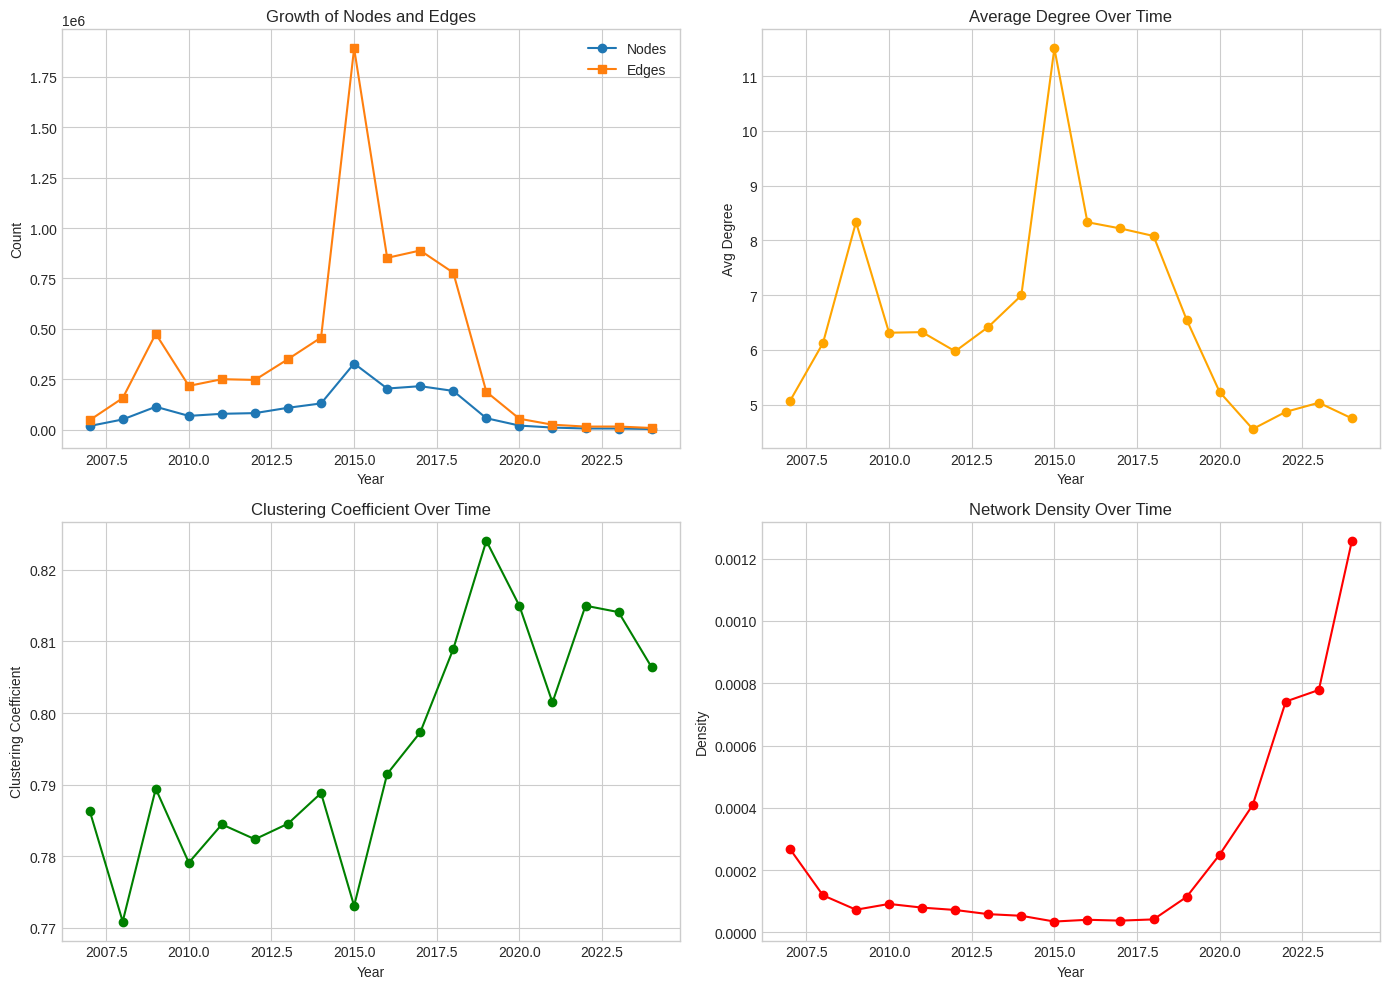

In [6]:
import matplotlib.pyplot as plt

# Set figure style
plt.style.use('seaborn-whitegrid')
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
df_metrics.sort_index(inplace=True)

# Plot 1: Number of Nodes and Edges
axs[0, 0].plot(df_metrics.index, df_metrics["Nodes"], marker='o', label="Nodes")
axs[0, 0].plot(df_metrics.index, df_metrics["Edges"], marker='s', label="Edges")
axs[0, 0].set_title("Growth of Nodes and Edges")
axs[0, 0].set_xlabel("Year")
axs[0, 0].set_ylabel("Count")
axs[0, 0].legend()

# Plot 2: Average Degree
axs[0, 1].plot(df_metrics.index, df_metrics["Avg_Degree"], color='orange', marker='o')
axs[0, 1].set_title("Average Degree Over Time")
axs[0, 1].set_xlabel("Year")
axs[0, 1].set_ylabel("Avg Degree")

# Plot 3: Clustering Coefficient
axs[1, 0].plot(df_metrics.index, df_metrics["Clustering"], color='green', marker='o')
axs[1, 0].set_title("Clustering Coefficient Over Time")
axs[1, 0].set_xlabel("Year")
axs[1, 0].set_ylabel("Clustering Coefficient")

# Plot 4: Density
axs[1, 1].plot(df_metrics.index, df_metrics["Density"], color='red', marker='o')
axs[1, 1].set_title("Network Density Over Time")
axs[1, 1].set_xlabel("Year")
axs[1, 1].set_ylabel("Density")

plt.tight_layout()
plt.show()


## **Log-Log Degree Distribution Plot for Selected Years**

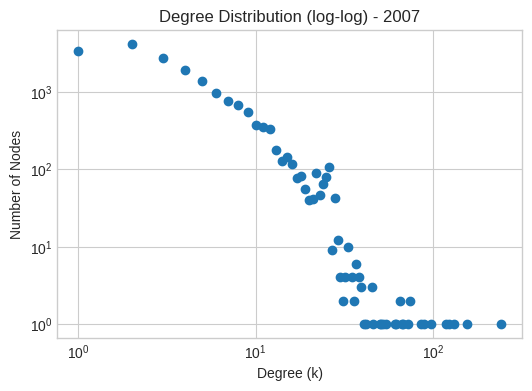

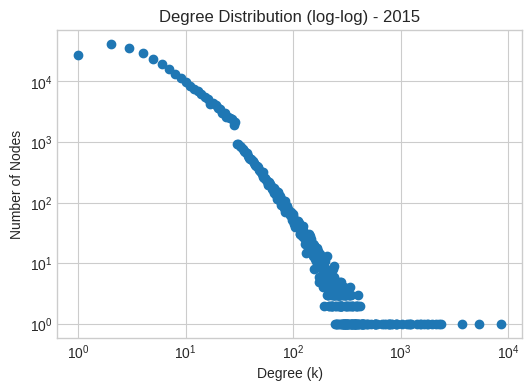

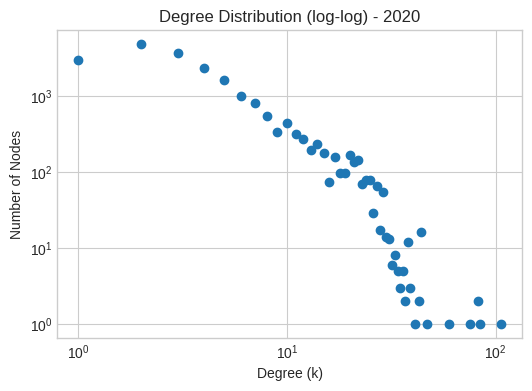

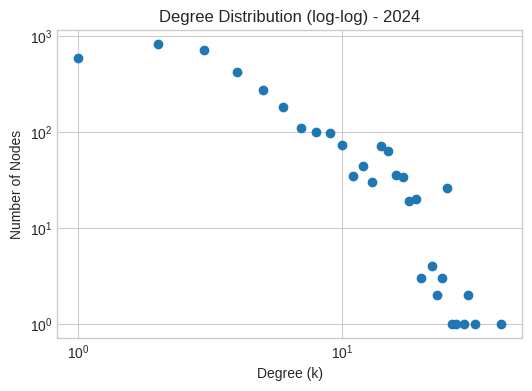

In [7]:
import numpy as np

# Choose representative years
years_to_plot = [2007, 2015, 2020, 2024]

for year in years_to_plot:
    G = yearly_graphs[year]
    degrees = [d for _, d in G.degree()]
    degree_counts = np.bincount(degrees)
    nonzero_degrees = np.nonzero(degree_counts)[0]
    
    plt.figure(figsize=(6, 4))
    plt.loglog(nonzero_degrees, degree_counts[nonzero_degrees], marker='o', linestyle='None')
    plt.title(f"Degree Distribution (log-log) - {year}")
    plt.xlabel("Degree (k)")
    plt.ylabel("Number of Nodes")
    plt.grid(True)
    plt.show()


## Understanding from the Plots (Log-Log Degree Distribution)
### **Graph 1 - 2007:**

* The plot shows a long-tailed distribution — most nodes have a low degree, but a few have significantly higher degrees.

* Indicates a scale-free structure early in the network's life.

### **Graph 2 - 2015:**

* The most pronounced power-law-like behavior is seen here.

* The tail is longer, indicating the presence of many high-degree nodes (likely hubs).

* The steep slope and straight-line pattern on the log-log plot strongly support a scale-free network structure.

### **Graph 3 - 2020:**

* Still follows a power-law, but the range of degrees has compressed due to a drop in network size (pandemic-era dip).

* Fewer high-degree nodes, possibly indicating fewer collaborations or fewer papers during this time.

### **Graph 4 - 2024:**

* Very few nodes and degrees due to recency.

* Still shows the long-tail pattern but is sparser, and deviation from the ideal power-law shape is visible due to insufficient data.


## Final Understanding
These log-log degree distribution plots validate that the collaboration network across years generally exhibits scale-free properties, especially in its most active periods (e.g., 2015). Such networks are resilient to random failures but vulnerable to targeted attacks on hubs — a common trait in real-world complex systems like citation and collaboration networks.

## **Louvain Community Detection and Modularity Analysis (Per Year)**



In [14]:
import community.community_louvain as community_louvain
from collections import Counter
import matplotlib.pyplot as plt
from tqdm import tqdm

modularity_per_year = {}
num_communities_per_year = {}
community_size_distributions = {}

# Iterate over each year's graph
for year in tqdm(sorted(yearly_graphs.keys())):
    G_year = yearly_graphs[year]
    
    if G_year.number_of_nodes() < 100:  # Skip small graphs
        continue

    # Apply Louvain
    partition = community_louvain.best_partition(G_year)

    # Store modularity
    communities = {}
    for node, comm_id in partition.items():
        communities.setdefault(comm_id, set()).add(node)
    community_list = list(communities.values())
    
    modularity = nx.algorithms.community.modularity(G_year, community_list)
    modularity_per_year[year] = modularity
    num_communities_per_year[year] = len(community_list)

    # Store community size distribution
    sizes = list(Counter(partition.values()).values())
    community_size_distributions[year] = sizes


100%|██████████| 25/25 [12:31<00:00, 30.07s/it] 


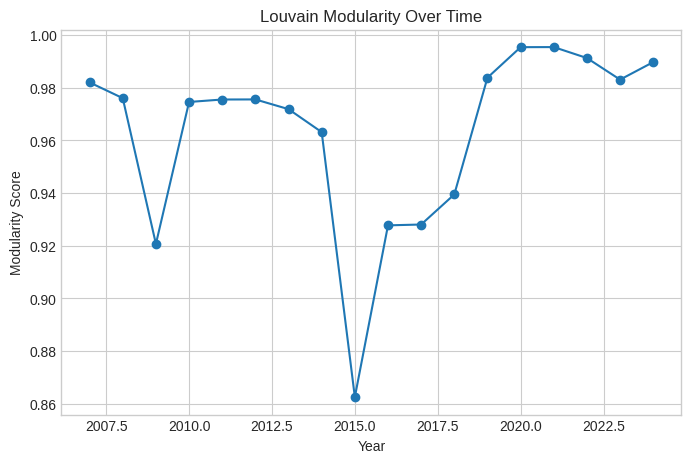

In [15]:
plt.figure(figsize=(8, 5))
plt.plot(modularity_per_year.keys(), modularity_per_year.values(), marker='o')
plt.title("Louvain Modularity Over Time")
plt.xlabel("Year")
plt.ylabel("Modularity Score")
plt.grid(True)
plt.show()

* The modularity remains high (~0.97–0.99) for most years, indicating strong community structure.

* A sharp dip in 2015 (~0.86) suggests a breakdown in clear community boundaries that year.

* The rise post-2016 may imply more distinct collaborative clusters returning or smaller isolated communities becoming more pronounced.



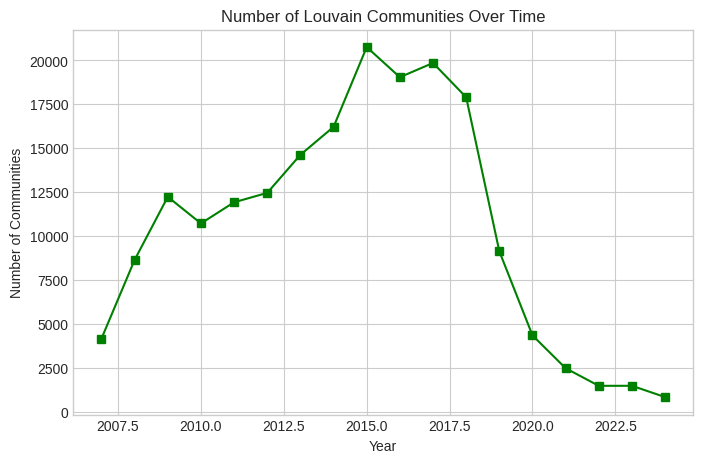

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(num_communities_per_year.keys(), num_communities_per_year.values(), marker='s', color='green')
plt.title("Number of Louvain Communities Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Communities")
plt.grid(True)
plt.show()

* There's a steady rise in the number of communities from 2007 to 2016, peaking at over 20,000.

* Post-2017, there's a sharp decline, reaching under 2,000 communities by 2024.

* This could suggest reduced diversity or fragmentation in collaborations, possibly due to fewer active researchers or more tightly-knit author groups in recent years.

### Final Understanding 
* 2015 is a clear anomaly, seen in both modularity and community count — likely caused by a surge in publications with many co-authors, weakening modular boundaries.

* Post-2020, a high modularity despite fewer communities suggests smaller but well-separated collaboration groups.

* The evolving structure of co-authorship reflects changes in how research is conducted — from diverse, expansive collaborations toward possibly tighter or more siloed communities.

## **Community Size Distribution Heatmap (Louvain)**

In [17]:
import pandas as pd
import numpy as np

# Define bins and labels
bins = [0, 5, 10, 20, 50, 100, 200, np.inf]
labels = ["1–5", "6–10", "11–20", "21–50", "51–100", "101–200", "200+"]

# Prepare heatmap data
heatmap_data = {}

for year, sizes in community_size_distributions.items():
    counts = pd.cut(sizes, bins=bins, labels=labels).value_counts().sort_index()
    heatmap_data[year] = counts

# Convert to DataFrame
df_heatmap = pd.DataFrame(heatmap_data).fillna(0).astype(int)
df_heatmap = df_heatmap.T  # Years as rows

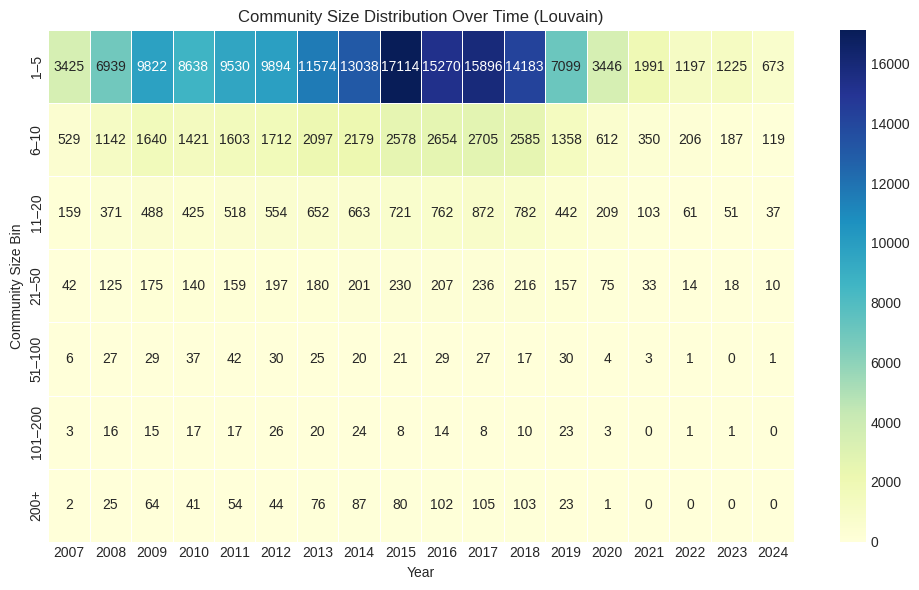

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap.T, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5)
plt.title("Community Size Distribution Over Time (Louvain)")
plt.xlabel("Year")
plt.ylabel("Community Size Bin")
plt.tight_layout()
plt.show()


## Final Understanding 
* The collaboration structure of academic publishing (as captured via co-authorship networks) was highly modular with many small, tight-knit communities, especially around 2015–2017.

* Post-2018, there's a noticeable fragmentation and shrinking of community sizes, signaling a change in the collaboration dynamics—likely due to fewer active authors, tighter niche groups, or external disruptions (e.g., COVID-19).

* Overall, the network evolves from large, dense clusters to sparse, fragmented groups in recent years.

## **Largest Louvain Community Size Over Time**

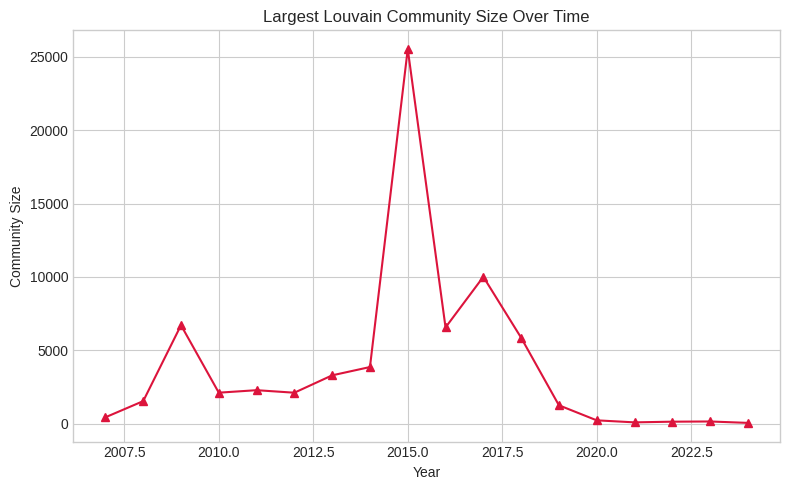

In [19]:
# Extract largest community size per year
largest_community_per_year = {
    year: max(sizes) for year, sizes in community_size_distributions.items()
}

# Plot
plt.figure(figsize=(8, 5))
plt.plot(
    largest_community_per_year.keys(),
    largest_community_per_year.values(),
    marker='^',
    linestyle='-',
    color='crimson'
)
plt.title("Largest Louvain Community Size Over Time")
plt.xlabel("Year")
plt.ylabel("Community Size")
plt.grid(True)
plt.tight_layout()
plt.show()


## Final Understanding
* 2015 likely represents a critical structural transition in the network — possibly due to merging of communities or dataset anomalies (e.g., bulk upload, change in collaboration structure).

* Post-2018, the fragmentation of the network is clear — no dominant clusters, lower cohesion, and decentralization of research communities.

* This matches the trend observed in modularity (dip in 2015) and density/average degree (fall after 2015).

## **DELIVERABLE 2 : Interdisciplinarity in Co-Authorship Patterns** 

In [20]:
from collections import defaultdict
import json
from tqdm import tqdm

# Use parsed authors for clean name extraction
def get_full_author_names(entry):
    names = []
    for a in entry.get('authors_parsed', []):
        if len(a) >= 2:
            full_name = a[1].strip() + " " + a[0].strip()
            names.append(full_name)
    return names

# Dictionary: author → set of unique categories (fields)
author_fields = defaultdict(set)

file_path = '/kaggle/input/arxiv/arxiv-metadata-oai-snapshot.json'

with open(file_path, 'r') as f:
    for line in tqdm(f, total=2716679):
        try:
            entry = json.loads(line)
            categories = entry['categories'].split()  # e.g., ["cs.LG", "stat.ML"]
            authors = get_full_author_names(entry)
            for author in authors:
                author_fields[author].update(categories)
        except:
            continue

print(f"Total unique authors: {len(author_fields)}")


2720631it [01:26, 31518.93it/s]                             

Total unique authors: 1790103


In [21]:
import numpy as np

def compute_entropy(categories):
    probs = np.ones(len(categories)) / len(categories)  # Uniform distribution
    return -np.sum(probs * np.log2(probs))

# Dictionary: author → entropy score
author_entropy = {}

for author, fields in author_fields.items():
    if len(fields) > 1:  # Entropy not defined for single-field authors
        author_entropy[author] = compute_entropy(fields)

# Sort by highest entropy
top_interdisciplinary = sorted(author_entropy.items(), key=lambda x: x[1], reverse=True)[:20]

# Display top results
print("Top Interdisciplinary Authors (by Entropy):")
for author, score in top_interdisciplinary:
    print(f"{author}: {score:.4f}")


Top Interdisciplinary Authors (by Entropy):
Wei Wang: 7.0553
Yang Liu: 6.9425
Xin Li: 6.9189
Wei Zhang: 6.8948
Wei Li: 6.8826
Yang Li: 6.8826
Wei Chen: 6.8704
Yu Zhang: 6.8580
Jun Wang: 6.8329
Yi Zhang: 6.8202
Yu Wang: 6.8074
Lei Zhang: 6.8074
Jun Zhang: 6.7944
Bo Li: 6.7944
Wei Liu: 6.7814
Hui Li: 6.7415
Lei Wang: 6.7415
Xi Chen: 6.7279
Xiang Li: 6.7279
Yu Chen: 6.7142


In [23]:
import numpy as np

def compute_entropy(field_set):
    total = len(field_set)
    if total == 0:
        return 0
    prob = 1 / total
    return -total * prob * np.log2(prob)

# Compute entropy for each author
entropy_scores = {}
for author, fields in author_fields.items():
    entropy_scores[author] = compute_entropy(fields)


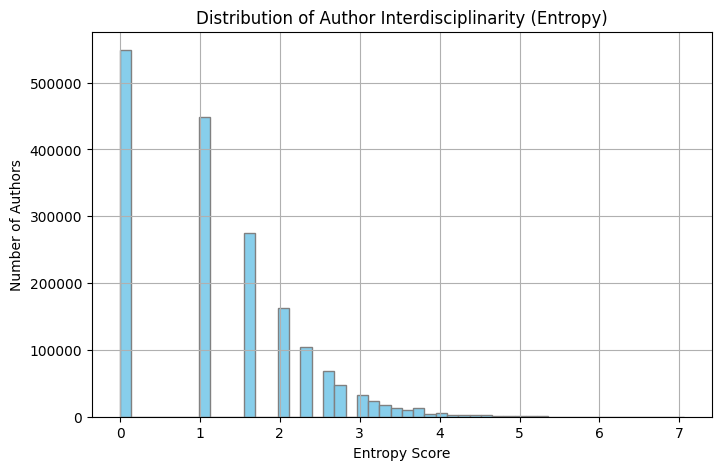

In [24]:
import matplotlib.pyplot as plt

# Entropy list (already computed previously)
entropy_values = list(entropy_scores.values())

plt.figure(figsize=(8, 5))
plt.hist(entropy_values, bins=50, color='skyblue', edgecolor='gray')
plt.xlabel("Entropy Score")
plt.ylabel("Number of Authors")
plt.title("Distribution of Author Interdisciplinarity (Entropy)")
plt.grid(True)
plt.show()


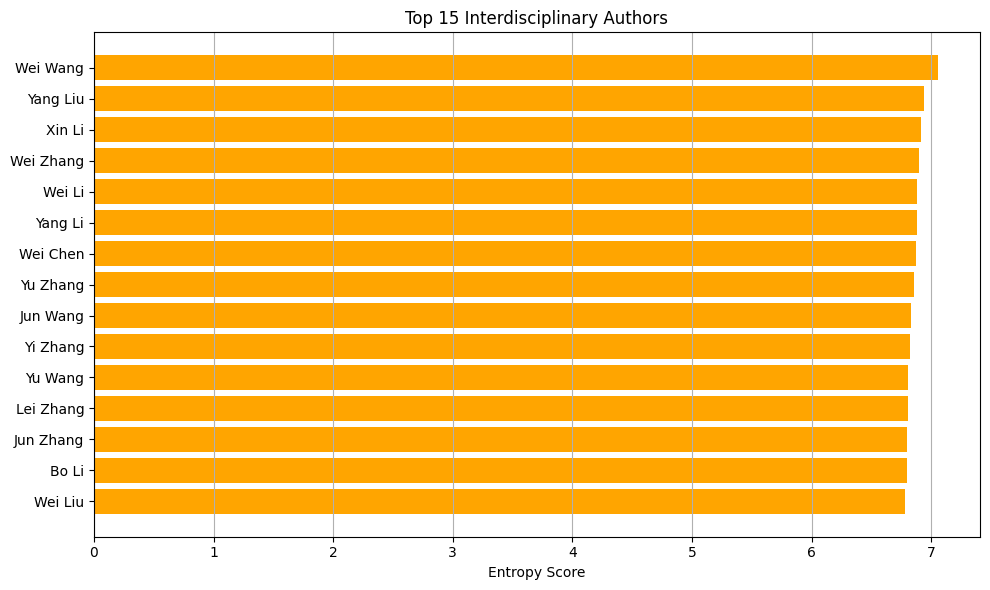

In [25]:
top_entropy = sorted(entropy_scores.items(), key=lambda x: x[1], reverse=True)[:15]
names = [author for author, _ in top_entropy]
scores = [score for _, score in top_entropy]

plt.figure(figsize=(10, 6))
plt.barh(names[::-1], scores[::-1], color='orange')
plt.xlabel("Entropy Score")
plt.title("Top 15 Interdisciplinary Authors")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()


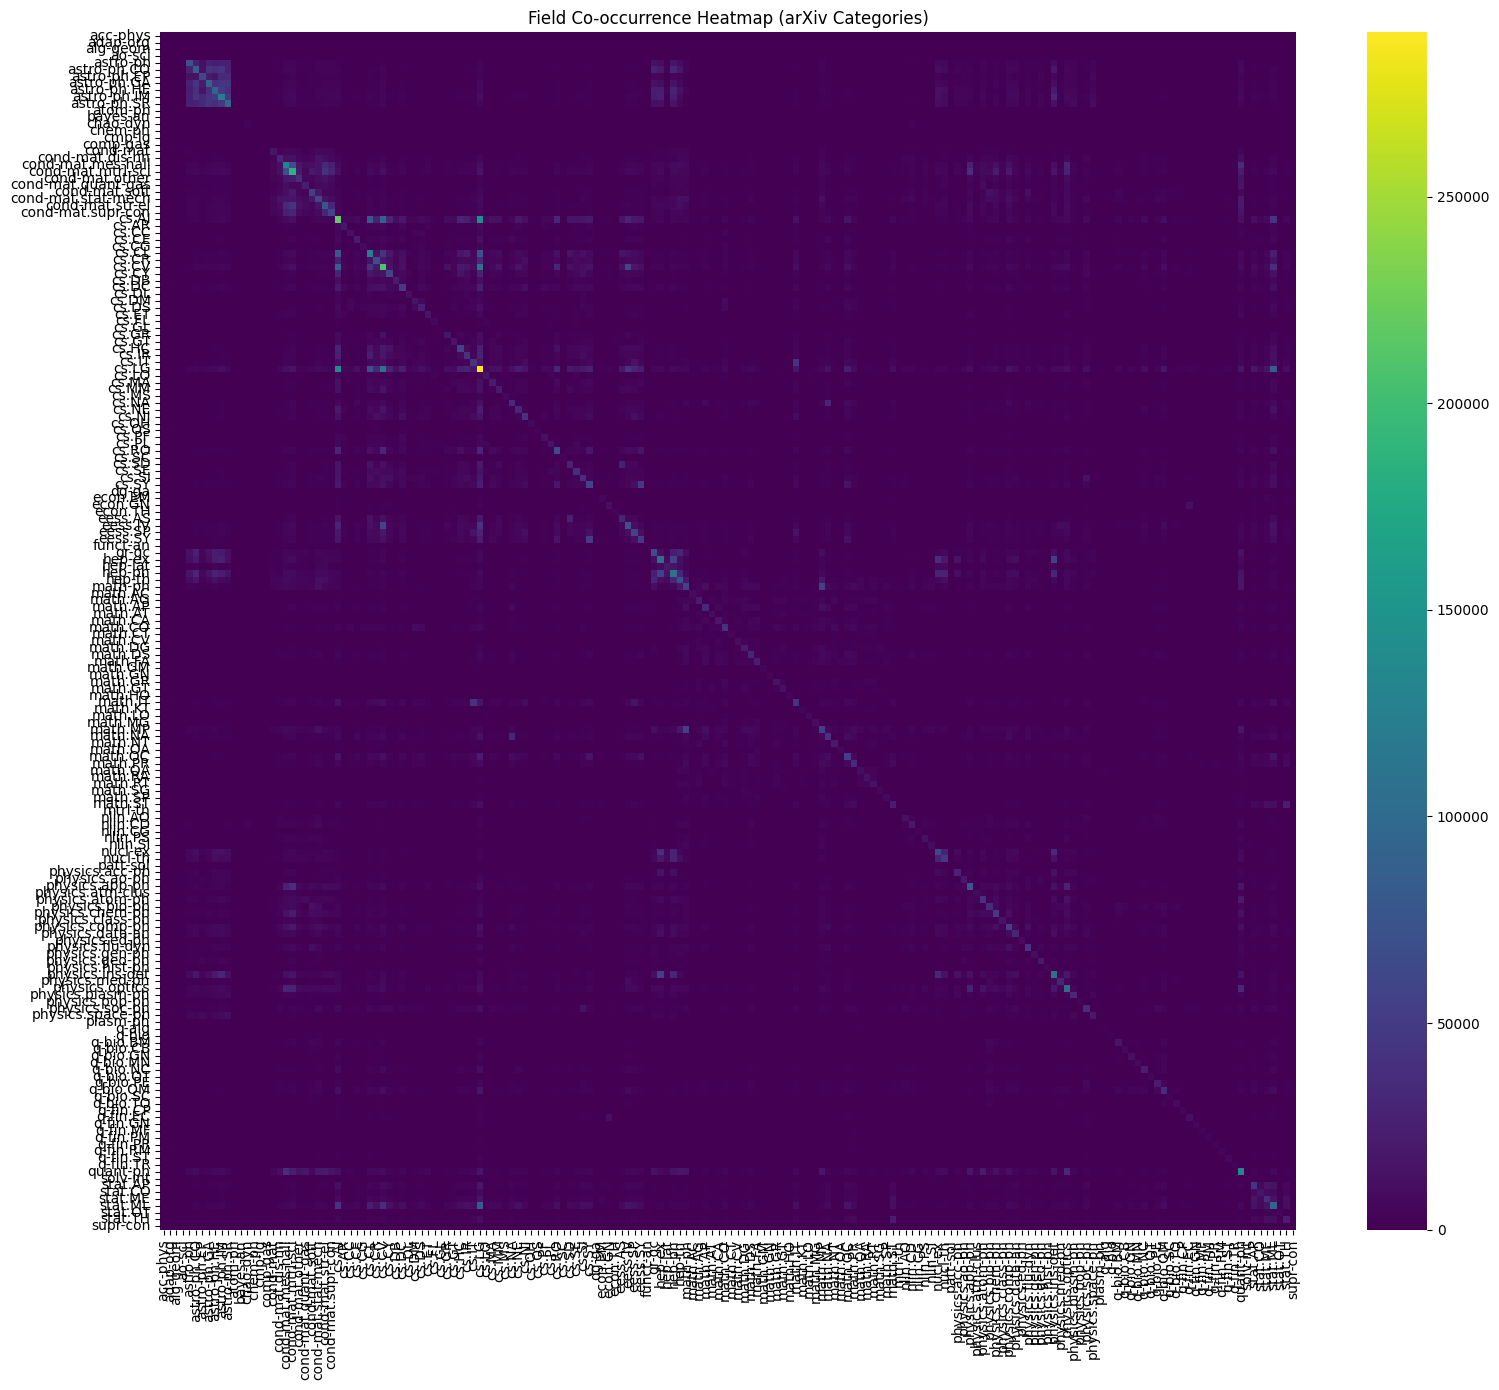

In [27]:
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Count category co-occurrences (including diagonals)
co_occurrence = Counter()

for fields in author_fields.values():
    fields = list(fields)
    for i in range(len(fields)):
        for j in range(i, len(fields)):  # include diagonals
            pair = tuple(sorted([fields[i], fields[j]]))
            co_occurrence[pair] += 1

# Step 2: Create a list of unique categories
categories = sorted({cat for pair in co_occurrence for cat in pair})

# Step 3: Create co-occurrence matrix
matrix = np.zeros((len(categories), len(categories)))

cat_to_idx = {cat: i for i, cat in enumerate(categories)}

for (cat1, cat2), count in co_occurrence.items():
    i, j = cat_to_idx[cat1], cat_to_idx[cat2]
    matrix[i, j] = count
    matrix[j, i] = count  # symmetry

# Step 4: Visualize as heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(matrix, xticklabels=categories, yticklabels=categories, cmap='viridis', norm=None)
plt.title("Field Co-occurrence Heatmap (arXiv Categories)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


In [36]:
from collections import defaultdict, Counter
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

# --- Step 1: Choose year and load graph ---
year = 2015
G = yearly_graphs[year].copy()

# --- Step 2: Assign dominant field to each author ---
def get_dominant_field(author):
    fields = list(author_fields.get(author, []))
    return fields[0] if fields else "Unknown"

for node in G.nodes():
    G.nodes[node]["field"] = get_dominant_field(node)

# --- Step 3: Compute neighbor field diversity ---
bridge_scores = []

for node in G.nodes():
    neighbor_fields = [G.nodes[nbr].get("field", "Unknown") for nbr in G.neighbors(node)]
    diversity = len(set(neighbor_fields))
    own_field = G.nodes[node]["field"]
    bridge_scores.append({
        "Author": node,
        "Field": own_field,
        "Neighbor_Field_Diversity": diversity,
        "Degree": G.degree(node)
    })

df_diversity = pd.DataFrame(bridge_scores)
df_diversity = df_diversity.sort_values(by="Neighbor_Field_Diversity", ascending=False)

# --- Step 4: Display top interdisciplinary bridge authors ---
print("Top Interdisciplinary Bridge Authors (by neighbor field diversity):")
print(df_diversity.head(10))


Top Interdisciplinary Bridge Authors (by neighbor field diversity):
          Author              Field  Neighbor_Field_Diversity  Degree
9077      Wei Li           q-fin.GN                        46     256
14203  Jian Wang            math.GT                        42     194
13473        Jr.            Unknown                        42     420
5340   Jing Wang  cond-mat.mes-hall                        41     283
4362   Wei Zhang           q-fin.GN                        40     198
33071   Wei Chen              cs.CC                        39     151
39581     J. Liu            eess.IV                        39     305
13596   Wei Wang            math.GT                        38     132
30650    Xi Chen           q-fin.GN                        38     250
10171      Y. Li              cs.DC                        36     242


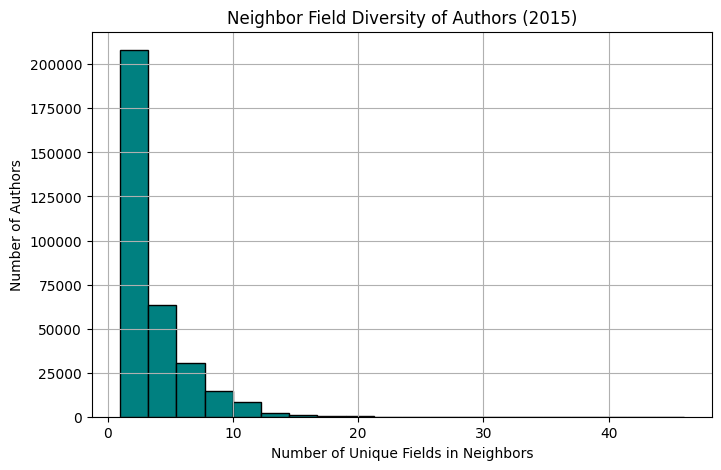

In [37]:
plt.figure(figsize=(8, 5))
plt.hist(df_diversity["Neighbor_Field_Diversity"], bins=20, color='teal', edgecolor='black')
plt.title(f"Neighbor Field Diversity of Authors ({year})")
plt.xlabel("Number of Unique Fields in Neighbors")
plt.ylabel("Number of Authors")
plt.grid(True)
plt.show()

In [39]:
cross_field_edges = 0
same_field_edges = 0

for u, v in G.edges():
    field_u = G.nodes[u].get("field", "Unknown")
    field_v = G.nodes[v].get("field", "Unknown")
    if field_u != "Unknown" and field_v != "Unknown":
        if field_u != field_v:
            cross_field_edges += 1
        else:
            same_field_edges += 1

total_considered = cross_field_edges + same_field_edges
if total_considered > 0:
    cross_field_pct = 100 * cross_field_edges / total_considered
else:
    cross_field_pct = 0

print(f"Total considered edges: {total_considered}")
print(f"Cross-field edges: {cross_field_edges}")
print(f"Same-field edges: {same_field_edges}")
print(f"Cross-field collaboration rate: {cross_field_pct:.2f}%")


Total considered edges: 871935
Cross-field edges: 569906
Same-field edges: 302029
Cross-field collaboration rate: 65.36%


100%|██████████| 25/25 [00:16<00:00,  1.54it/s]


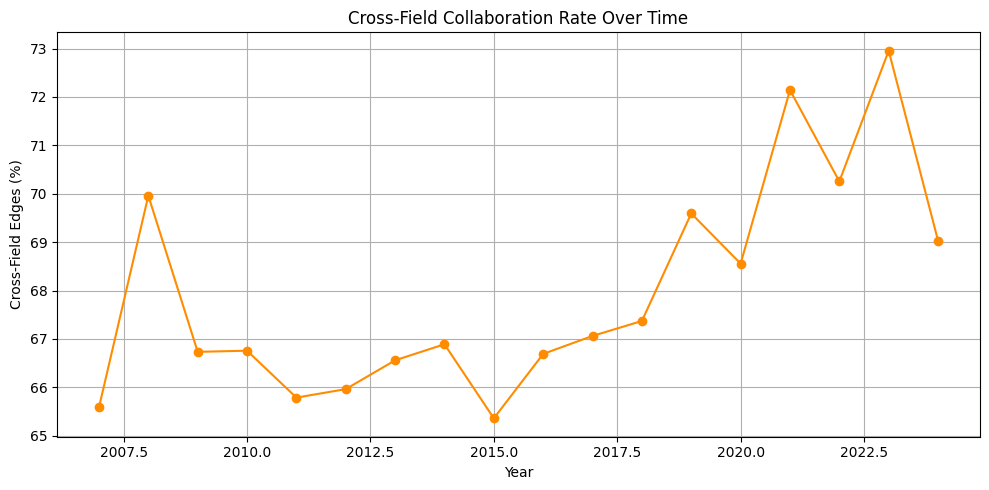

In [40]:
crossfield_stats = []

for year, G in tqdm(yearly_graphs.items()):
    count_cross = 0
    count_same = 0

    for u, v in G.edges():
        f1 = get_dominant_field(u)
        f2 = get_dominant_field(v)

        if f1 != "Unknown" and f2 != "Unknown":
            if f1 != f2:
                count_cross += 1
            else:
                count_same += 1

    total = count_cross + count_same
    if total > 0:
        cross_pct = 100 * count_cross / total
        crossfield_stats.append((year, cross_pct))

# Convert to DataFrame
df_crossfield = pd.DataFrame(crossfield_stats, columns=["Year", "Cross_Field_Percentage"])
df_crossfield.set_index("Year", inplace=True)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df_crossfield.index, df_crossfield["Cross_Field_Percentage"], marker='o', color='darkorange')
plt.title("Cross-Field Collaboration Rate Over Time")
plt.xlabel("Year")
plt.ylabel("Cross-Field Edges (%)")
plt.grid(True)
plt.tight_layout()
plt.show()


DELIVERABLE 3

STEP 1 : Build Train and Test Graphs

In [41]:
from collections import defaultdict

def build_yearly_edges(start, end):
    edges = set()
    for year in range(start, end + 1):
        if year in yearly_graphs:
            edges.update(yearly_graphs[year].edges())
    return edges

# Build G_train and G_test
train_edges = build_yearly_edges(2010, 2015)
test_edges = build_yearly_edges(2016, 2018)

# Train graph
G_train = nx.Graph()
for u, v in train_edges:
    G_train.add_edge(u, v)

# Ensure test edges are only among known train nodes
G_test = set()
for u, v in test_edges:
    if u in G_train and v in G_train and not G_train.has_edge(u, v):
        G_test.add((u, v))

print(f"Train edges: {len(G_train.edges())}")
print(f"Test candidate edges (future links): {len(G_test)}")


Train edges: 3109445
Test candidate edges (future links): 553103


Step 2 : Score Candidate Links with Link Prediction Heuristics

In [42]:
from tqdm import tqdm
from networkx.algorithms.link_prediction import (
    jaccard_coefficient,
    adamic_adar_index,
    preferential_attachment
)

# Generate candidate non-edges: All possible pairs not connected in train graph
# Limit for speed – only sample high-degree nodes
train_nodes = sorted(G_train.degree, key=lambda x: x[1], reverse=True)
candidate_nodes = [n for n, _ in train_nodes[:2000]]  # Tune this for performance

candidate_pairs = []
for i in range(len(candidate_nodes)):
    for j in range(i + 1, len(candidate_nodes)):
        u, v = candidate_nodes[i], candidate_nodes[j]
        if not G_train.has_edge(u, v):
            candidate_pairs.append((u, v))

print(f"Total candidate pairs: {len(candidate_pairs)}")

# Jaccard Score
print("Scoring with Jaccard...")
jaccard_scores = list(jaccard_coefficient(G_train, candidate_pairs))

# Adamic-Adar
print("Scoring with Adamic-Adar...")
aa_scores = list(adamic_adar_index(G_train, candidate_pairs))

# Preferential Attachment
print("Scoring with Preferential Attachment...")
pa_scores = list(preferential_attachment(G_train, candidate_pairs))


Total candidate pairs: 1962555
Scoring with Jaccard...
Scoring with Adamic-Adar...
Scoring with Preferential Attachment...


step 3 : Evaluate Link Prediction Models using Precision@k

In [44]:
def precision_at_k(predicted_edges, true_edges, k=100):
    top_k = sorted(predicted_edges, key=lambda x: x[2], reverse=True)[:k]
    predicted_set = set((u, v) for u, v, _ in top_k)
    correct = predicted_set & true_edges
    return len(correct) / k

# Use G_test directly as the ground-truth future links
true_edges = set(G_test)

# Evaluate each heuristic
prec_jaccard = precision_at_k(jaccard_scores, true_edges, k=100)
prec_aa = precision_at_k(aa_scores, true_edges, k=100)
prec_pa = precision_at_k(pa_scores, true_edges, k=100)

print(f"Precision@100 - Jaccard: {prec_jaccard:.3f}")
print(f"Precision@100 - Adamic-Adar: {prec_aa:.3f}")
print(f"Precision@100 - Pref. Attachment: {prec_pa:.3f}")


Precision@100 - Jaccard: 0.050
Precision@100 - Adamic-Adar: 0.110
Precision@100 - Pref. Attachment: 0.000


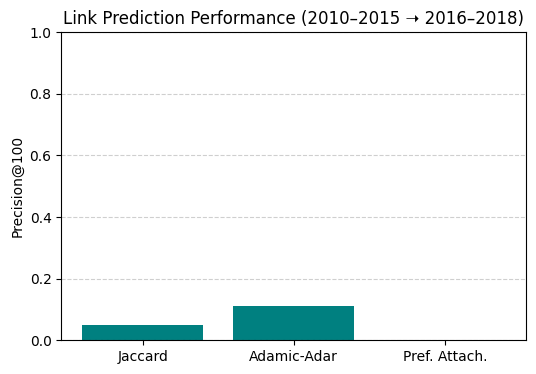

In [45]:
import matplotlib.pyplot as plt

methods = ["Jaccard", "Adamic-Adar", "Pref. Attach."]
precisions = [prec_jaccard, prec_aa, prec_pa]

plt.figure(figsize=(6, 4))
plt.bar(methods, precisions, color="teal")
plt.ylabel("Precision@100")
plt.title("Link Prediction Performance (2010–2015 ➝ 2016–2018)")
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


DELIVERABLE 4

In [46]:
import json
import networkx as nx
from tqdm import tqdm
from collections import defaultdict
import re

# Helper to clean author list
def clean_authors(raw_string):
    raw_string = re.sub(r"\(.*?\)", "", raw_string)  # remove affiliations
    authors = [a.strip() for a in raw_string.split(',') if a.strip()]
    return authors

# Build yearly co-authorship graphs for cs.LG
yearly_graphs_cs_lg = defaultdict(nx.Graph)
file_path = '/kaggle/input/arxiv/arxiv-metadata-oai-snapshot.json'

with open(file_path, 'r') as f:
    for line in tqdm(f, total=2716679):
        try:
            entry = json.loads(line)
            if 'cs.LG' not in entry['categories']:
                continue
            year = int(entry['update_date'][:4])
            authors = clean_authors(entry['authors'])
            if len(authors) > 30:
                continue  # skip mega papers
            for i in range(len(authors)):
                for j in range(i + 1, len(authors)):
                    yearly_graphs_cs_lg[year].add_edge(authors[i], authors[j])
        except:
            continue

print(f"Years with cs.LG papers: {sorted(yearly_graphs_cs_lg.keys())}")


2720631it [01:10, 38446.18it/s]                             

Years with cs.LG papers: [2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024, 2025]


In [47]:
import pandas as pd
from tqdm import tqdm

# Analyze yearly graph stats
metrics_cs_lg = []

for year in tqdm(sorted(yearly_graphs_cs_lg.keys())):
    G = yearly_graphs_cs_lg[year]
    N = G.number_of_nodes()
    E = G.number_of_edges()
    if N == 0:
        continue
    avg_deg = sum(dict(G.degree()).values()) / N
    clustering = nx.average_clustering(G)
    density = nx.density(G)
    
    metrics_cs_lg.append({
        "Year": year,
        "Nodes": N,
        "Edges": E,
        "Avg_Degree": avg_deg,
        "Clustering": clustering,
        "Density": density
    })

df_cs_lg_metrics = pd.DataFrame(metrics_cs_lg).set_index("Year")
df_cs_lg_metrics


100%|██████████| 19/19 [00:14<00:00,  1.33it/s]


,Nodes,Edges,Avg_Degree,Clustering,Density
Year,,,,,
2007,307,428,2.788274,0.748281,0.009112
2008,133,202,3.037594,0.694164,0.023012
2009,354,494,2.790960,0.800251,0.007906
2010,354,537,3.033898,0.734900,0.008595
2011,496,728,2.935484,0.826714,0.005930
2012,1923,2943,3.060842,0.719587,0.001593
2013,1908,3617,3.791405,0.764760,0.001988
2014,2535,4336,3.420907,0.798089,0.001350
2015,3764,6992,3.715197,0.813879,0.000987


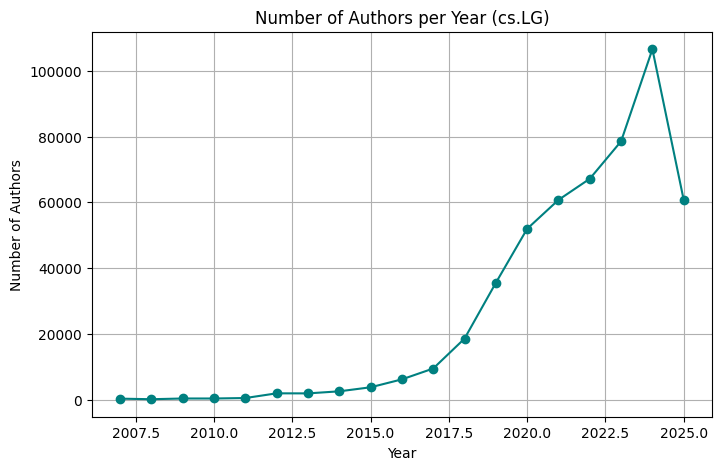

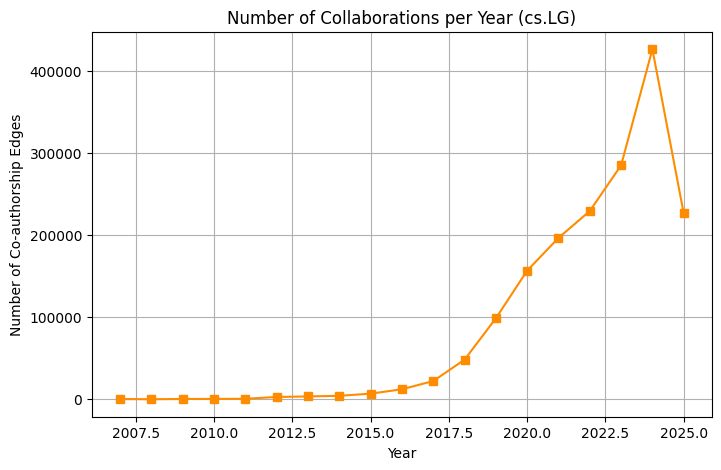

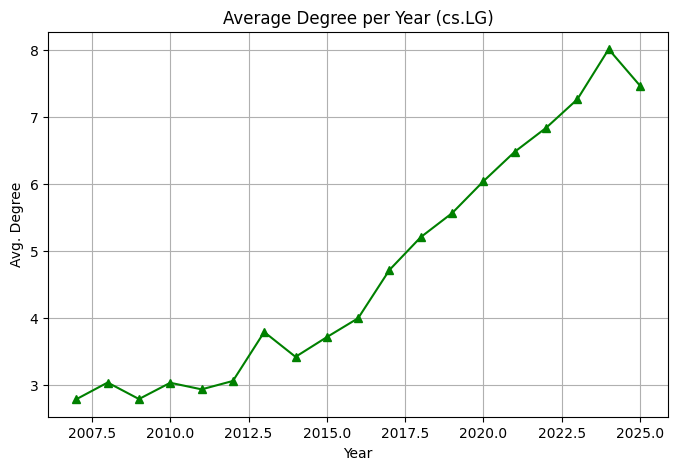

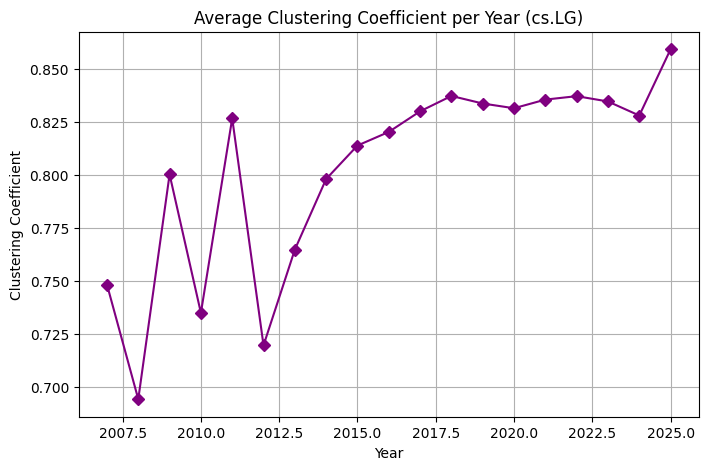

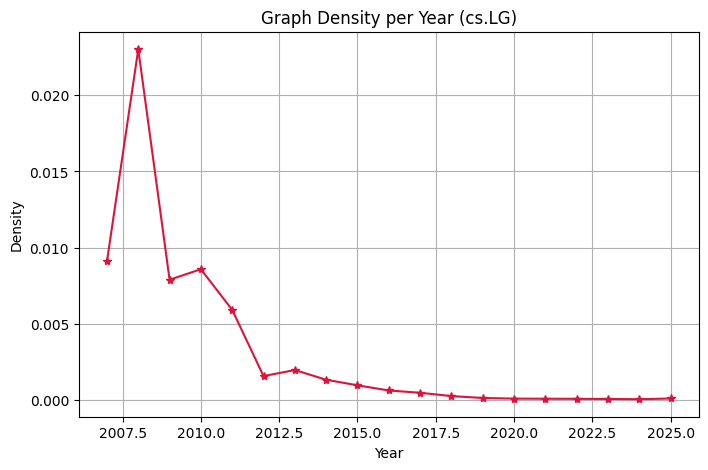

In [48]:
import matplotlib.pyplot as plt

# Plot: Number of Authors (Nodes)
plt.figure(figsize=(8,5))
df_cs_lg_metrics["Nodes"].plot(marker='o', color='teal')
plt.title("Number of Authors per Year (cs.LG)")
plt.xlabel("Year")
plt.ylabel("Number of Authors")
plt.grid(True)
plt.show()

# Plot: Number of Edges
plt.figure(figsize=(8,5))
df_cs_lg_metrics["Edges"].plot(marker='s', color='darkorange')
plt.title("Number of Collaborations per Year (cs.LG)")
plt.xlabel("Year")
plt.ylabel("Number of Co-authorship Edges")
plt.grid(True)
plt.show()

# Plot: Average Degree
plt.figure(figsize=(8,5))
df_cs_lg_metrics["Avg_Degree"].plot(marker='^', color='green')
plt.title("Average Degree per Year (cs.LG)")
plt.xlabel("Year")
plt.ylabel("Avg. Degree")
plt.grid(True)
plt.show()

# Plot: Clustering Coefficient
plt.figure(figsize=(8,5))
df_cs_lg_metrics["Clustering"].plot(marker='D', color='purple')
plt.title("Average Clustering Coefficient per Year (cs.LG)")
plt.xlabel("Year")
plt.ylabel("Clustering Coefficient")
plt.grid(True)
plt.show()

# Plot: Graph Density
plt.figure(figsize=(8,5))
df_cs_lg_metrics["Density"].plot(marker='*', color='crimson')
plt.title("Graph Density per Year (cs.LG)")
plt.xlabel("Year")
plt.ylabel("Density")
plt.grid(True)
plt.show()


In [49]:
import community.community_louvain as community_louvain

# Storage for year-wise metrics
community_stats = []

for year in tqdm(sorted(yearly_graphs.keys())):
    G_year = yearly_graphs[year]
    if G_year.number_of_nodes() < 10:
        continue  # Skip too-small graphs

    # Get largest connected component for stability
    G_lcc = max(nx.connected_components(G_year), key=len)
    G_sub = G_year.subgraph(G_lcc).copy()

    # Louvain community detection
    partition = community_louvain.best_partition(G_sub)
    num_comms = len(set(partition.values()))

    # Convert to list of sets
    communities = defaultdict(set)
    for node, comm_id in partition.items():
        communities[comm_id].add(node)

    comm_list = list(communities.values())
    modularity = nx.algorithms.community.modularity(G_sub, comm_list)

    community_stats.append({
        "Year": year,
        "Num_Communities": num_comms,
        "Modularity": modularity
    })

# Convert to DataFrame
df_communities = pd.DataFrame(community_stats).set_index("Year")


100%|██████████| 25/25 [07:43<00:00, 18.54s/it]


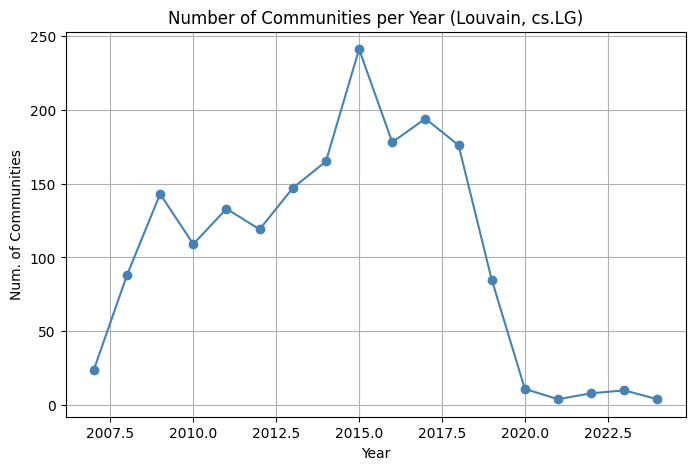

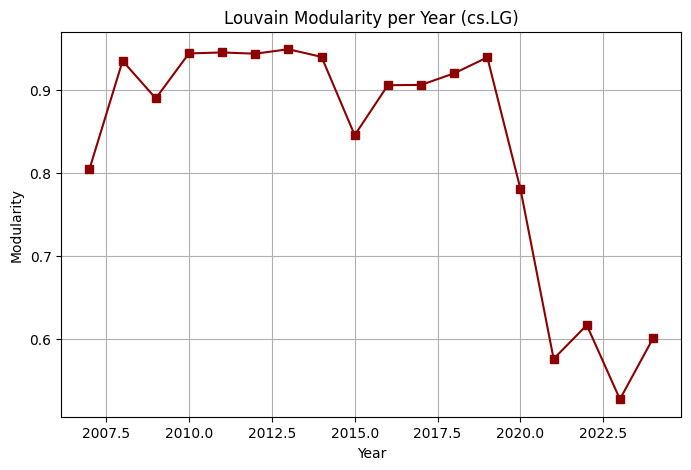

In [50]:
# Plot: Number of Communities
plt.figure(figsize=(8,5))
df_communities["Num_Communities"].plot(marker='o', color='steelblue')
plt.title("Number of Communities per Year (Louvain, cs.LG)")
plt.xlabel("Year")
plt.ylabel("Num. of Communities")
plt.grid(True)
plt.show()

# Plot: Modularity Score
plt.figure(figsize=(8,5))
df_communities["Modularity"].plot(marker='s', color='darkred')
plt.title("Louvain Modularity per Year (cs.LG)")
plt.xlabel("Year")
plt.ylabel("Modularity")
plt.grid(True)
plt.show()


In [51]:
from collections import Counter

year = 2018
G = yearly_graphs[year].copy()

# Function to assign dominant field
def get_dominant_field(author):
    fields = list(author_fields.get(author, []))
    return fields[0] if fields else "Unknown"

# Classify edges
intra_field = 0
cross_field = 0

for u, v in G.edges():
    field_u = get_dominant_field(u)
    field_v = get_dominant_field(v)
    if field_u == field_v:
        intra_field += 1
    else:
        cross_field += 1

print(f"Intra-field edges: {intra_field}")
print(f"Cross-field edges: {cross_field}")


Intra-field edges: 255362
Cross-field edges: 523174


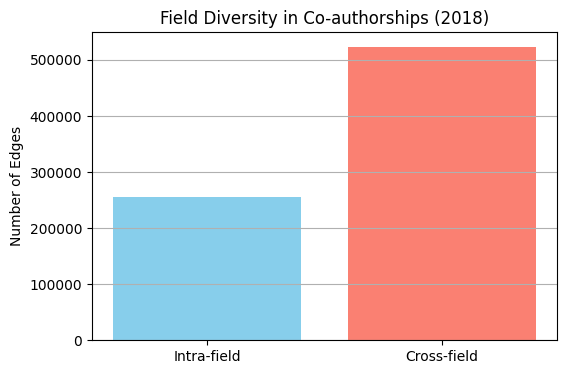

In [52]:
labels = ['Intra-field', 'Cross-field']
counts = [intra_field, cross_field]

plt.figure(figsize=(6, 4))
plt.bar(labels, counts, color=['skyblue', 'salmon'])
plt.title("Field Diversity in Co-authorships (2018)")
plt.ylabel("Number of Edges")
plt.grid(axis='y')
plt.show()


In [53]:
from collections import defaultdict
import seaborn as sns

year = 2018
G = yearly_graphs[year].copy()

# Build field-to-field matrix
field_pairs = defaultdict(int)

for u, v in G.edges():
    f1 = get_dominant_field(u)
    f2 = get_dominant_field(v)
    if f1 == "Unknown" or f2 == "Unknown":
        continue
    pair = tuple(sorted([f1, f2]))
    field_pairs[pair] += 1

# Extract all fields
fields = sorted(set([f for pair in field_pairs for f in pair]))

# Initialize matrix
field_matrix = pd.DataFrame(0, index=fields, columns=fields)

# Fill matrix
for (f1, f2), count in field_pairs.items():
    field_matrix.loc[f1, f2] = count
    field_matrix.loc[f2, f1] = count  # symmetric

# Optional: remove very rare fields to declutter
threshold = 100
filtered = field_matrix.sum(axis=1) > threshold
field_matrix = field_matrix.loc[filtered, filtered]


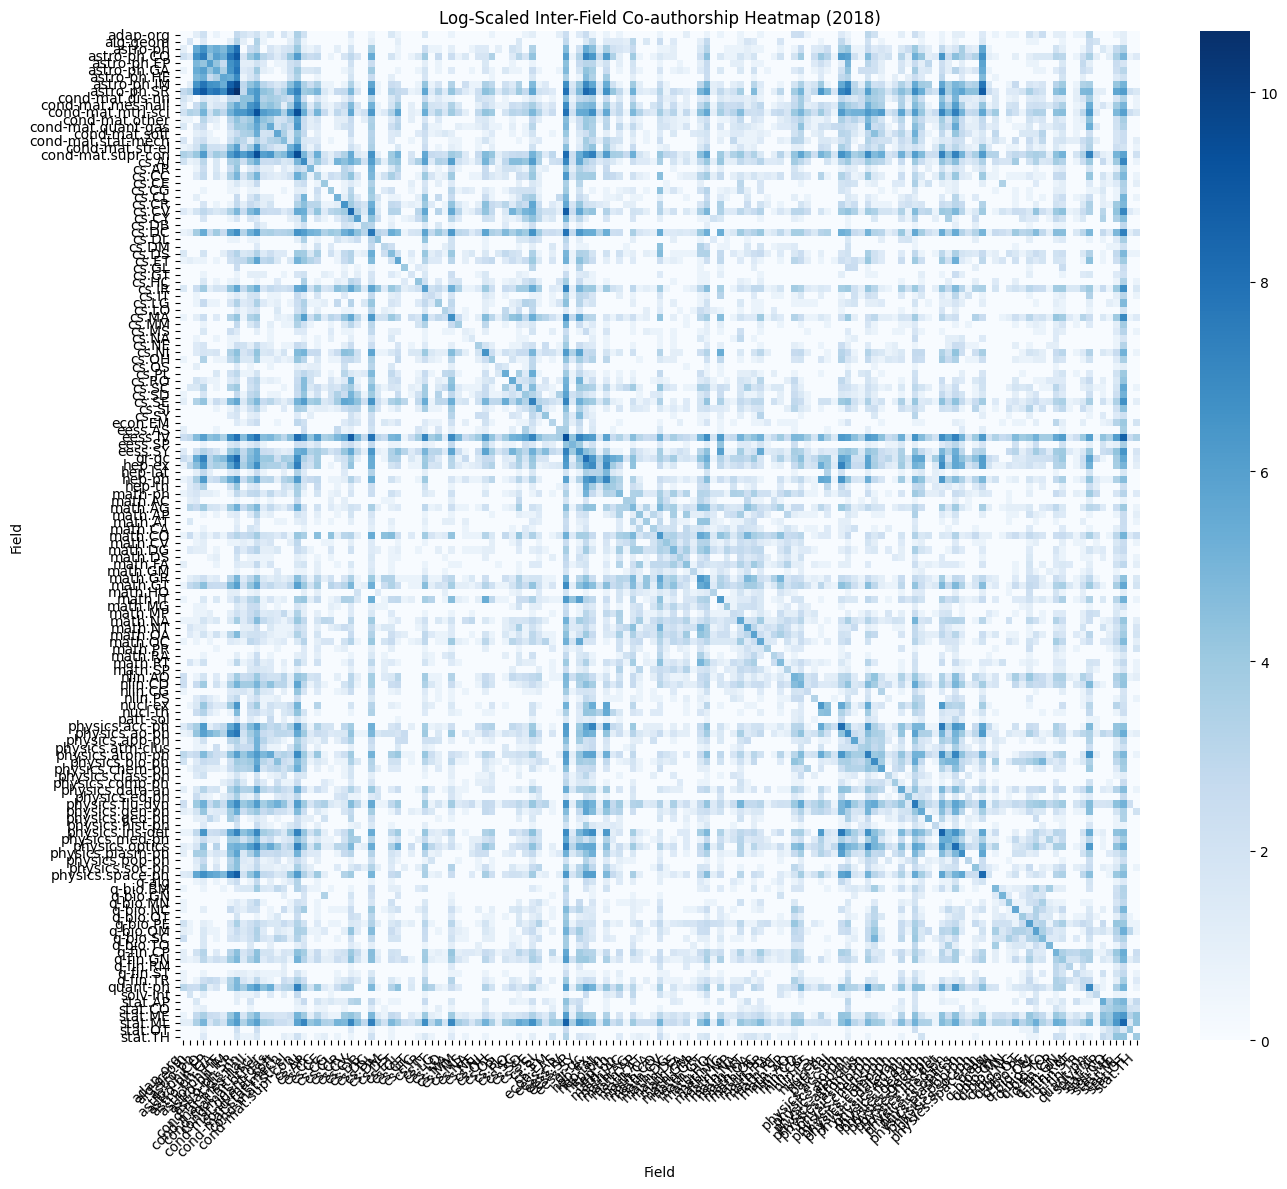

In [55]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Convert to log scale (add 1 to avoid log(0))
log_matrix = np.log1p(field_matrix.values)

plt.figure(figsize=(14, 12))
sns.heatmap(log_matrix, xticklabels=field_matrix.columns, yticklabels=field_matrix.index, cmap="Blues")
plt.title(f"Log-Scaled Inter-Field Co-authorship Heatmap ({year})")
plt.xlabel("Field")
plt.ylabel("Field")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [56]:
import networkx as nx
from networkx.algorithms.community import modularity
from collections import defaultdict

# Choose year
year = 2015
G = yearly_graphs[year].copy()

# Assign dominant field to each author (as node attribute)
def get_dominant_field(author):
    fields = list(author_fields.get(author, []))
    return fields[0] if fields else "Unknown"

for node in G.nodes():
    G.nodes[node]['field'] = get_dominant_field(node)

# Group nodes by field
field_communities = defaultdict(set)
for node, data in G.nodes(data=True):
    field = data.get('field', 'Unknown')
    field_communities[field].add(node)

# Convert to list of sets for modularity function
communities = list(field_communities.values())

# Compute modularity
mod_score = modularity(G, communities)
print(f"Field Modularity (Co-authorship Network {year}): {mod_score:.4f}")


Field Modularity (Co-authorship Network 2015): 0.2148


DELIVERABLE 5 : Field-Wise Hub Dominance in the Co-authorship Network

<Figure size 1000x600 with 0 Axes>

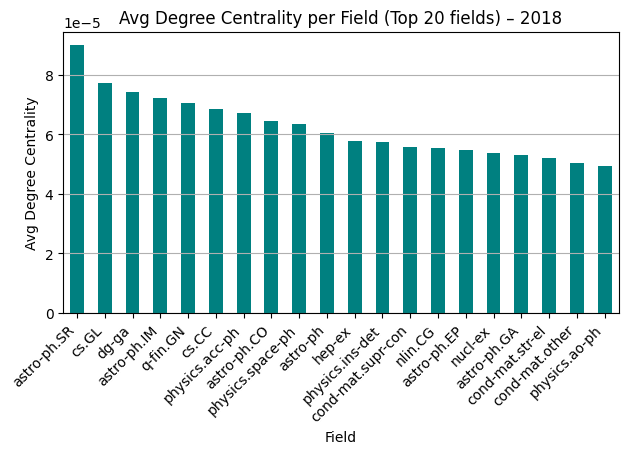

In [57]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
from tqdm import tqdm

# ---------- Step 1: Select year ----------
year = 2018
G = yearly_graphs[year].copy()

# ---------- Step 2: Assign dominant field ----------
def get_dominant_field(author):
    fields = list(author_fields.get(author, []))
    return fields[0] if fields else "Unknown"

nx.set_node_attributes(G, {node: get_dominant_field(node) for node in G.nodes()}, "field")

# ---------- Step 3: Degree Centrality ----------
deg_centrality = nx.degree_centrality(G)

# ---------- Step 4: Aggregate by Field ----------
field_scores = defaultdict(list)
for author, score in deg_centrality.items():
    field = G.nodes[author]["field"]
    field_scores[field].append(score)

field_avg = {field: sum(scores)/len(scores) for field, scores in field_scores.items()}
df_avg = pd.DataFrame.from_dict(field_avg, orient="index", columns=["Avg_Degree_Centrality"])
df_avg = df_avg.sort_values(by="Avg_Degree_Centrality", ascending=False)

# ---------- Step 5: Plot ----------
plt.figure(figsize=(10,6))
df_avg.head(20).plot(kind="bar", legend=False, color="teal")
plt.title(f"Avg Degree Centrality per Field (Top 20 fields) – {year}")
plt.ylabel("Avg Degree Centrality")
plt.xlabel("Field")
plt.grid(axis="y")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


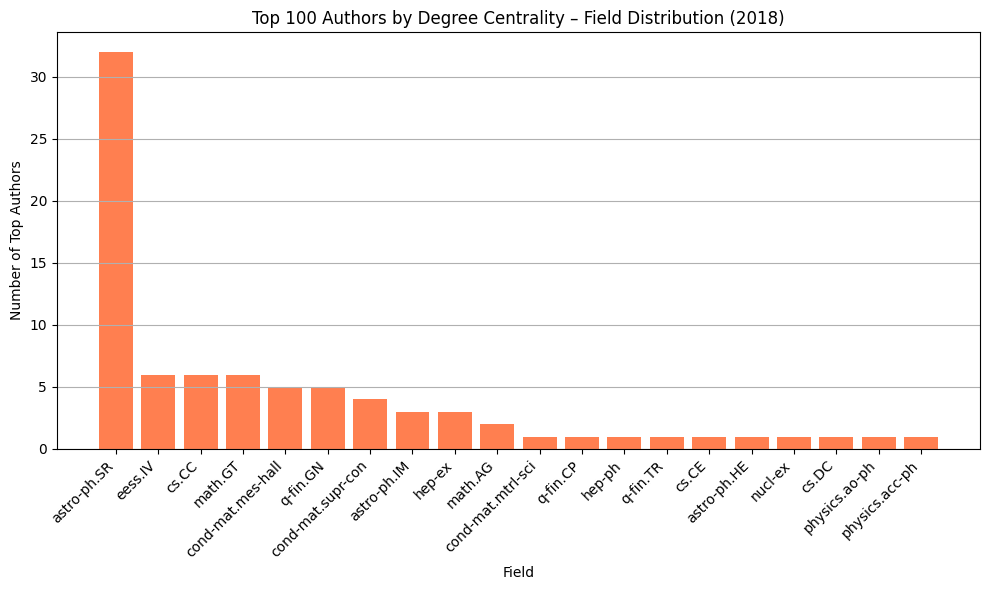

Unknown field ratio: 18.00%


In [61]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

# Step 1: Simple cleaning instead of unidecode
def get_dominant_field_simple(author):
    author_clean = author.lower().strip()
    for key in author_fields:
        key_clean = key.lower().strip()
        if author_clean == key_clean:
            fields = list(author_fields[key])
            return fields[0] if fields else "Unknown"
    return "Unknown"

# Step 2: Choose year and compute degree centrality
year = 2018
G = yearly_graphs[year].copy()
centrality = nx.degree_centrality(G)

# Step 3: Extract top 100 authors
top_authors = sorted(centrality.items(), key=lambda x: x[1], reverse=True)[:100]

# Step 4: Assign field to each top author
field_counts = defaultdict(int)
for author, _ in top_authors:
    field = get_dominant_field_simple(author)
    field_counts[field] += 1

# Step 5: Convert to DataFrame and filter out "Unknown"
df_top_fields = pd.DataFrame(field_counts.items(), columns=["Field", "Count"])
df_top_fields = df_top_fields[df_top_fields["Field"] != "Unknown"]
df_top_fields = df_top_fields.sort_values(by="Count", ascending=False)

# Step 6: Plot
plt.figure(figsize=(10, 6))
plt.bar(df_top_fields["Field"], df_top_fields["Count"], color="coral")
plt.title(f"Top 100 Authors by Degree Centrality – Field Distribution ({year})")
plt.xlabel("Field")
plt.ylabel("Number of Top Authors")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

# Optional: Print unknown ratio
unknown_ratio = sum(1 for author, _ in top_authors if get_dominant_field_simple(author) == "Unknown") / 100
print(f"Unknown field ratio: {unknown_ratio:.2%}")
